In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
# read data
redwine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
redwine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
X_red,Y_red=redwine.iloc[:,:11].values,redwine.iloc[:,-1].values

In [6]:
# devide into train and test data
X_red_train,X_red_test,Y_red_train,Y_red_test=train_test_split(X_red,Y_red,test_size=0.25,random_state=0)

In [10]:
# data standardization
s=StandardScaler()
Xs_red_train=s.fit_transform(X_red_train)
Xs_red_test=s.fit_transform(X_red_test)

In [11]:
# linear regression
lin=LinearRegression()
linear_model=lin.fit(Xs_red_train,Y_red_train)
y1=lin.intercept_+np.mat(Xs_red_test)*np.mat(lin.coef_).transpose()
RSS_linear=0
for i in range(len(y1)):
    RSS_linear=RSS_linear+(y1[i]-Y_red_test[i])**2

# in logistic regression and SVM classification, consider the quality>6 is good wine
# Logistic regression
Y_lr_train=(Y_red_train>6)
Y_lr_test=(Y_red_test>6)
Logistic=LogisticRegression()
Logistic.fit(Xs_red_train,Y_lr_train)
y2=Logistic.predict(Xs_red_test)
RSS_Logistic=0
for i in range(len(y2)):
    RSS_Logistic=RSS_Logistic+(y2[i]-Y_lr_test[i])**2
                              
# SVM
svm_linear=SVC(kernel='linear',C=1.0,random_state=0)
svm_linear.fit(Xs_red_train,Y_lr_train)
svm_rbf=SVC(kernel='rbf',random_state=0,gamma=0.20,C=1.0)
svm_rbf.fit(Xs_red_train,Y_lr_train)

D:\software\Python\Anaconda\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# present the accuracy
print('The test RSS of linear regression is  %.3f' % float(RSS_linear))
print('The test RSS of Logistic regression is  %.3f' % float(RSS_Logistic))
print('The test accuracy of linear SVM is  %.3f' % svm_linear.score(Xs_red_test,Y_lr_test))
print('The test accuracy of rbf SVM is  %.3f' % svm_rbf.score(Xs_red_test,Y_lr_test))

The test RSS of linear regression is  160.614
The test RSS of Logistic regression is  45.000
The test accuracy of linear SVM is  0.887
The test accuracy of rbf SVM is  0.917


In [13]:
# classifier with PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Logistic regression
pipe_lr_pca=Pipeline([('scl',StandardScaler()),
                      ('pca',PCA(n_components=2)),
                      ('clf',LogisticRegression(random_state=1))])
pipe_lr_pca.fit(X_red_train,Y_lr_train)

# kernel SVM
pipe_svm_pca=Pipeline([('scl',StandardScaler()),
                       ('pca',PCA(n_components=2)),
                       ('clf',SVC(kernel='rbf',random_state=0,gamma=0.20,C=1.0))]) 
pipe_svm_pca.fit(X_red_train,Y_lr_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))])

In [14]:
print('The test accuracy of Logistic regression(with PCA) is  %.3f' % pipe_lr_pca.score(X_red_test,Y_lr_test))
print('The test accuracy of rbf SVM(with PCA) is  %.3f' % pipe_svm_pca.score(X_red_test,Y_lr_test))

The test accuracy of Logistic regression(with PCA) is  0.882
The test accuracy of rbf SVM(with PCA) is  0.887


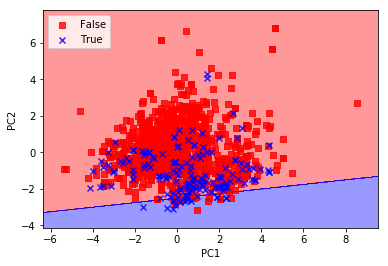

In [18]:
# shows the result of Logistic regression classifier in picture
import matplotlib.pyplot as plot
from matplotlib.colors import ListedColormap

X_red_train_pca=pipe_lr_pca.named_steps['pca'].fit_transform(Xs_red_train)
X_red_test_pca=pipe_lr_pca.named_steps['pca'].fit_transform(Xs_red_test)

def plot_decision(X,Y,classifier,resolution=0.02):
    # setup marker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(Y))])
    
    # decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plot.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plot.xlim(xx1.min(),xx1.max())
    plot.ylim(xx2.min(),xx2.max())
    # plot class smaples
    for i,cl in enumerate(np.unique(Y)):
        plot.scatter(x=X[Y==cl,0],y=X[Y==cl,1],
                     alpha=0.8,c=cmap(i),
                     marker=markers[i],label=cl)

plot_decision(X_red_train_pca,Y_lr_train,classifier=pipe_lr_pca.named_steps['clf'])
plot.xlabel('PC1')
plot.ylabel('PC2')
plot.legend(loc='upper left')
plot.show()